<a href="https://colab.research.google.com/github/AhmedFarrag223/Bachelor-Thesis-Machine-Learning-Applications-in-Facilitating-Digitalized-Supply-Chain-Management-S/blob/main/DataCo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Relevant Libraries

In [2]:
# Initialising drive
from google.colab import drive
drive.mount('/content/drive')

# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import datetime as dt
import calendar,warnings,itertools,matplotlib,keras,shutil
import tensorflow as tf
import statsmodels.api as sm
from datetime import datetime
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from sklearn.datasets import load_iris,make_regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.kernel_ridge import KernelRidge
from keras import Sequential
from keras.layers import Dense
from IPython.core import display as ICD
#Hiding the warnings
warnings.filterwarnings('ignore') 

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset_path = '/content/drive/MyDrive/DataCo/DataCoSupplyChainDataset.csv'
data = pd.read_csv(dataset_path, encoding='unicode_escape')
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
data.shape

(180519, 53)

Data Cleaning

In [5]:
data.apply(lambda x: sum(x.isnull()))

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [6]:
data['Customer Full Name'] = data['Customer Fname'].astype(str)+data['Customer Lname'].astype(str)

In [7]:
data.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)'],axis=1, inplace = True)

In [8]:
data.shape

(180519, 42)

In [9]:
data['Customer Zipcode']=data['Customer Zipcode'].fillna(0)

Data Visualization

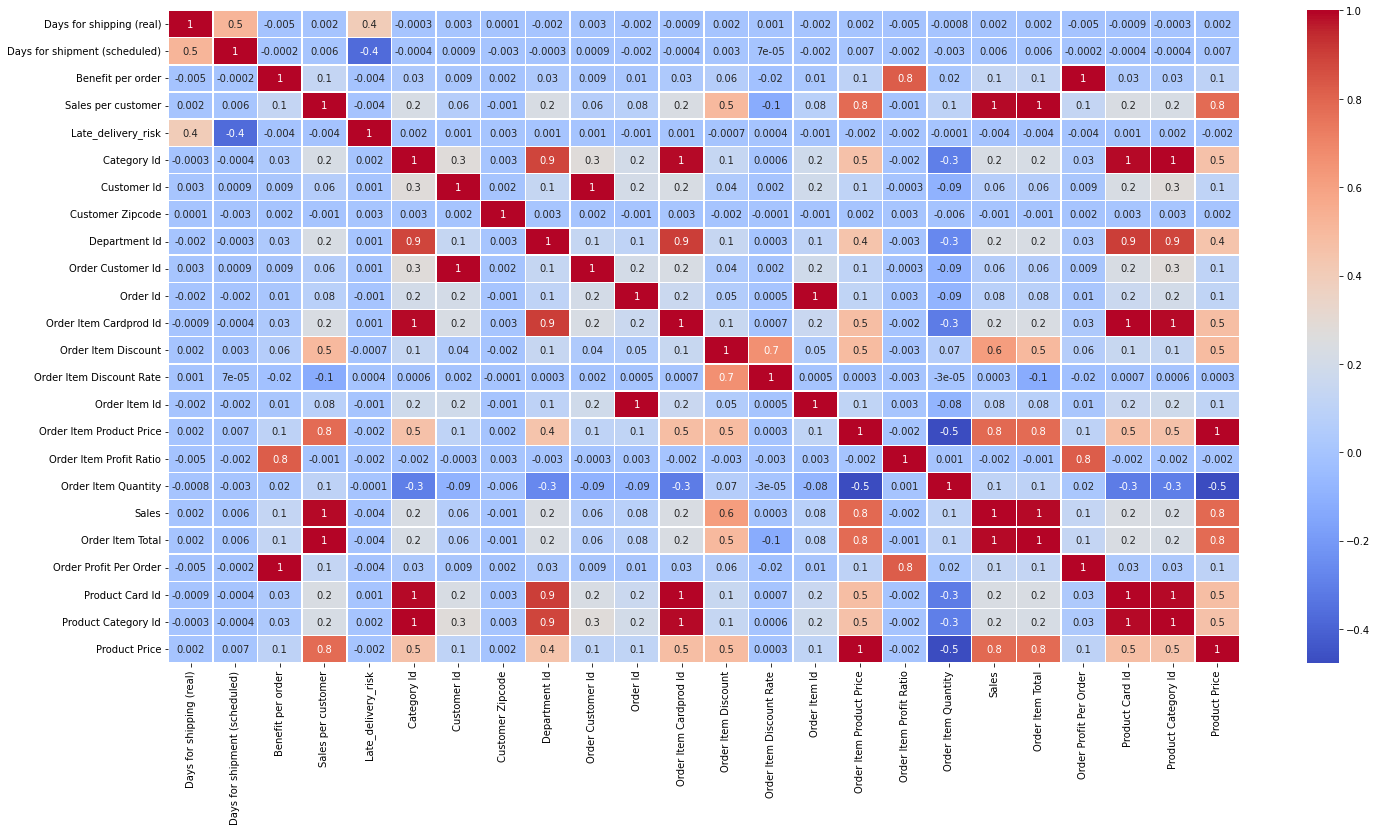

In [10]:
fig, ax = plt.subplots(figsize=(24,12))
sns.heatmap(data.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm')

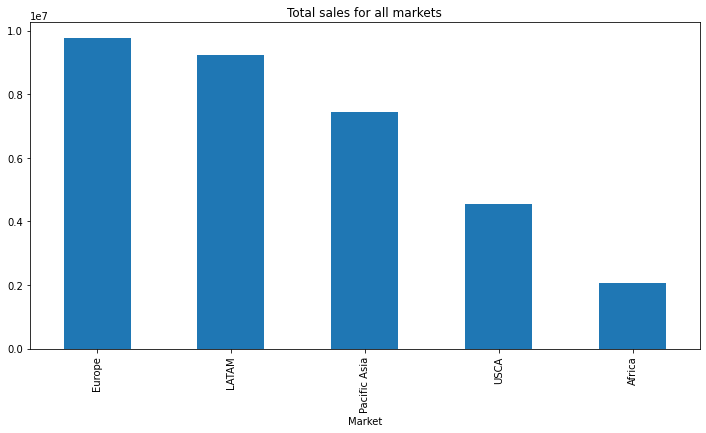

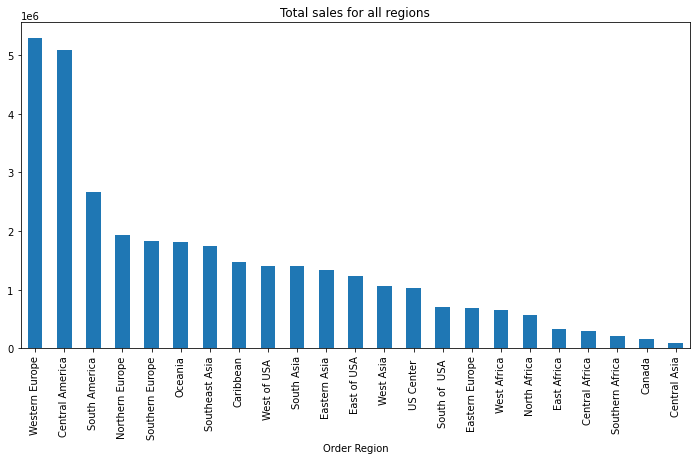

In [11]:
market = data.groupby('Market') 
region = data.groupby('Order Region')
plt.figure(1)
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all markets")
plt.figure(2)
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all regions")

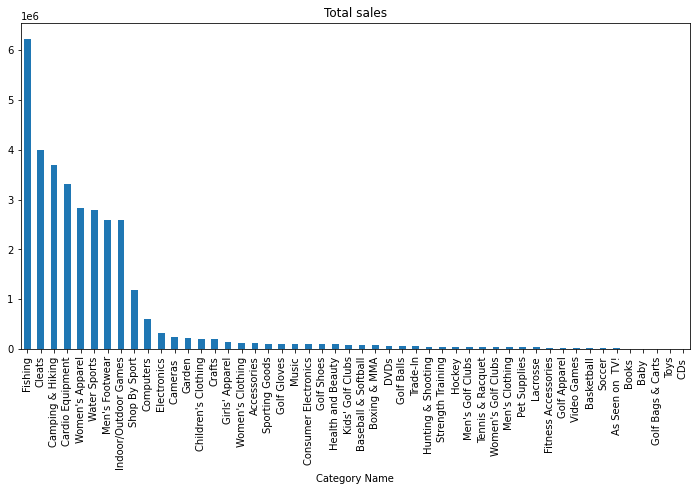

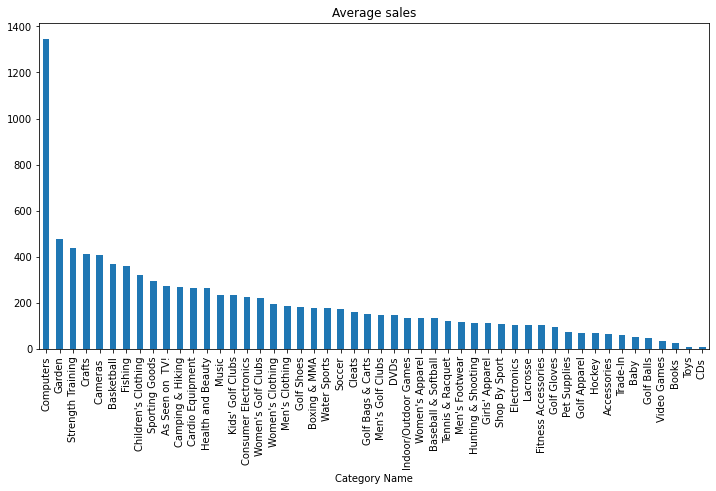

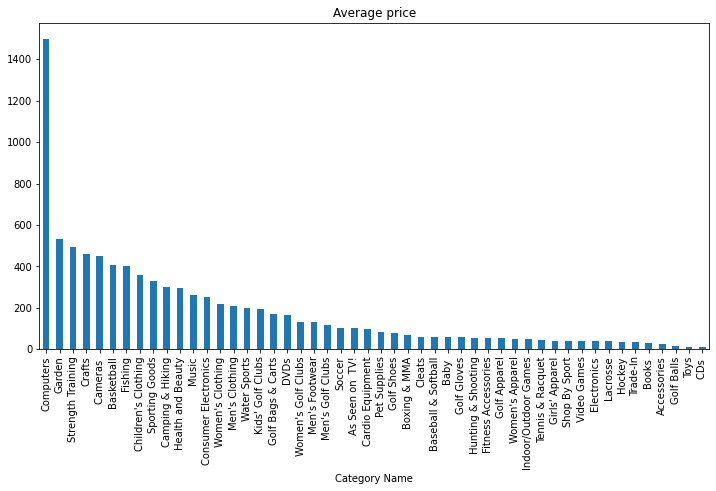

In [12]:
cat = data.groupby('Category Name')
plt.figure(1)
cat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales")
plt.figure(2)
cat['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average sales")
plt.figure(3)
cat['Product Price'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average price")

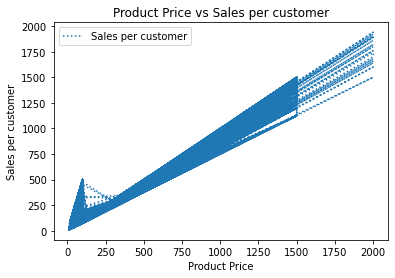

In [13]:
data.plot(x='Product Price', y='Sales per customer',linestyle='dotted',
     markerfacecolor='blue', markersize=12) 
plt.title('Product Price vs Sales per customer')
plt.xlabel('Product Price')  
plt.ylabel('Sales per customer') 
plt.show()

In [14]:
data['order_year']= pd.to_datetime(data['order date (DateOrders)']).dt.year
data['order_month'] = pd.to_datetime(data['order date (DateOrders)']).dt.month
data['order_week_day'] = pd.to_datetime(data['order date (DateOrders)']).dt.day_name()
data['order_hour'] = pd.to_datetime(data['order date (DateOrders)']).dt.hour
data['order_month_year'] = pd.to_datetime(data['order date (DateOrders)']).dt.to_period('M')

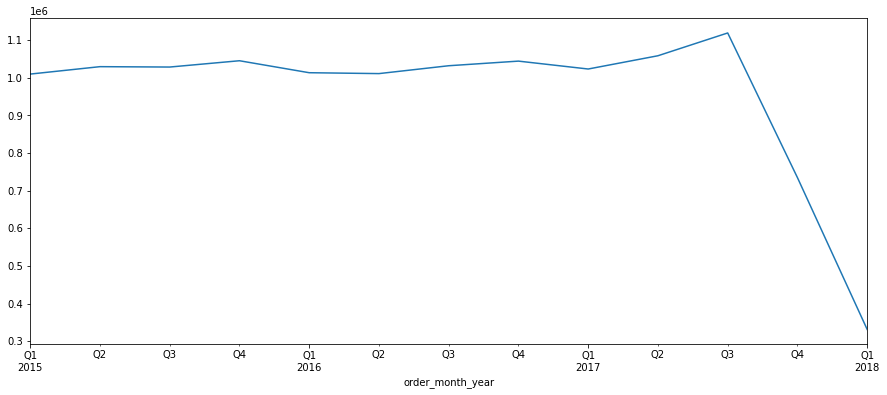

In [15]:
quarter= data.groupby('order_month_year')
quartersales=quarter['Sales'].sum().resample('Q').mean().plot(figsize=(15,6))

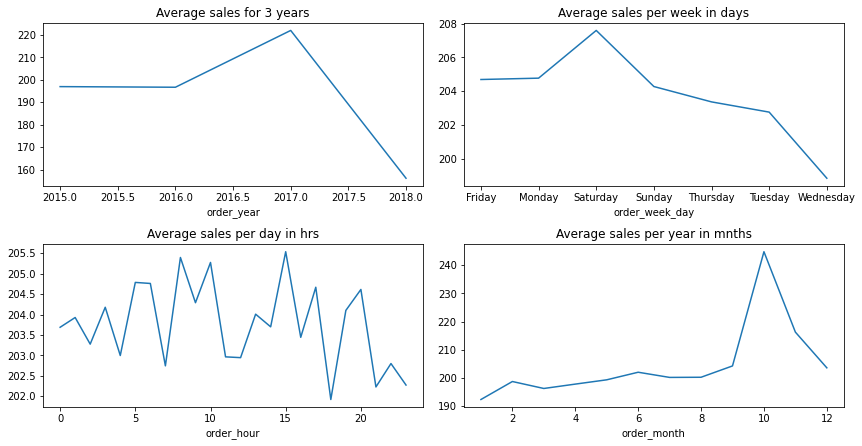

In [16]:
plt.figure(figsize=(10,12))
plt.subplot(4, 2, 1)
quarter= data.groupby('order_year')
quarter['Sales'].mean().plot(figsize=(12,12),title='Average sales for 3 years')
plt.subplot(4, 2, 2)
days=data.groupby("order_week_day")
days['Sales'].mean().plot(figsize=(12,12),title='Average sales per week in days')
plt.subplot(4, 2, 3)
hrs=data.groupby("order_hour")
hrs['Sales'].mean().plot(figsize=(12,12),title='Average sales per day in hrs')
plt.subplot(4, 2, 4)
mnth=data.groupby("order_month")
mnth['Sales'].mean().plot(figsize=(12,12),title='Average sales per year in mnths')
plt.tight_layout()
plt.show()

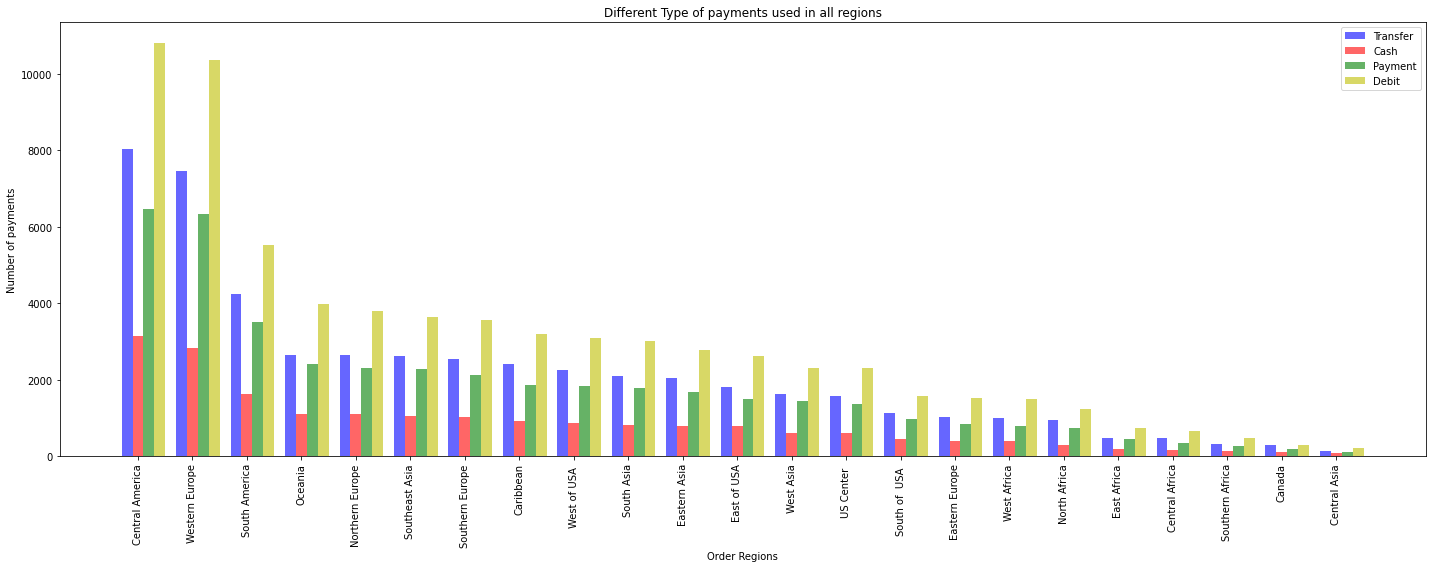

In [17]:
xyz1 = data[(data['Type'] == 'TRANSFER')]
xyz2= data[(data['Type'] == 'CASH')]
xyz3= data[(data['Type'] == 'PAYMENT')]
xyz4= data[(data['Type'] == 'DEBIT')]
count1=xyz1['Order Region'].value_counts()
count2=xyz2['Order Region'].value_counts()
count3=xyz3['Order Region'].value_counts()
count4=xyz4['Order Region'].value_counts()
names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Transfer')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='Cash')
type3=plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='g',label='Payment')
type4=plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='y',label='Debit')
plt.xlabel('Order Regions')
plt.ylabel('Number of payments')
plt.title('Different Type of payments used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()

Total revenue lost with orders -3883547.345768667


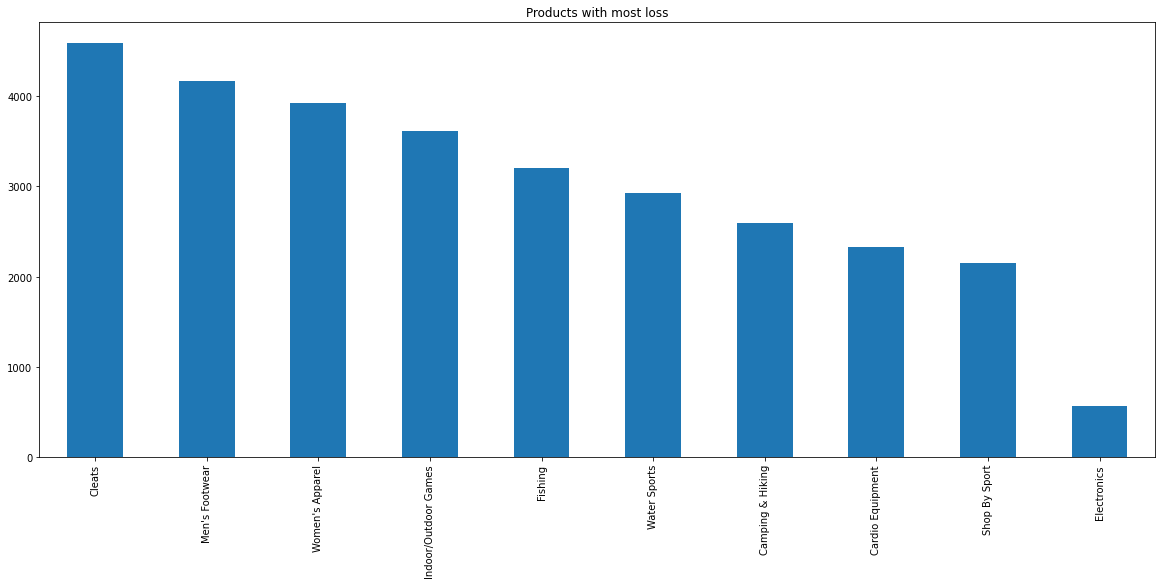

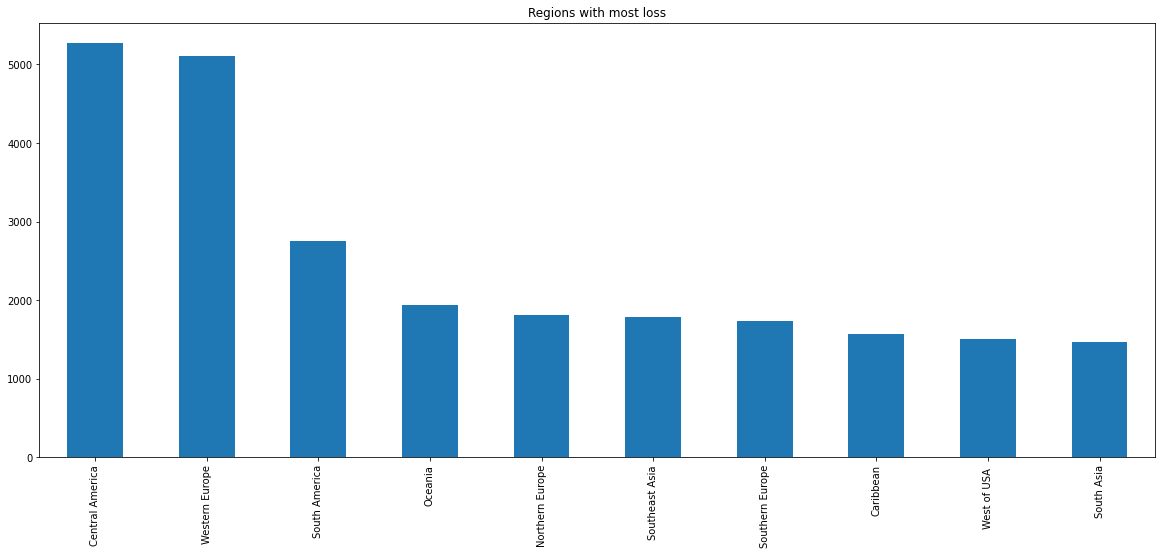

In [18]:
loss = data[(data['Benefit per order']<0)]
plt.figure(1)
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Products with most loss")
plt.figure(2)
loss['Order Region'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Regions with most loss")
print('Total revenue lost with orders',loss['Benefit per order'].sum())

In [19]:
xyz = data[(data['Type'] != 'TRANSFER')&(data['Order Status'] == 'SUSPECTED_FRAUD')]
xyz['Order Region'].value_counts()

Series([], Name: Order Region, dtype: int64)

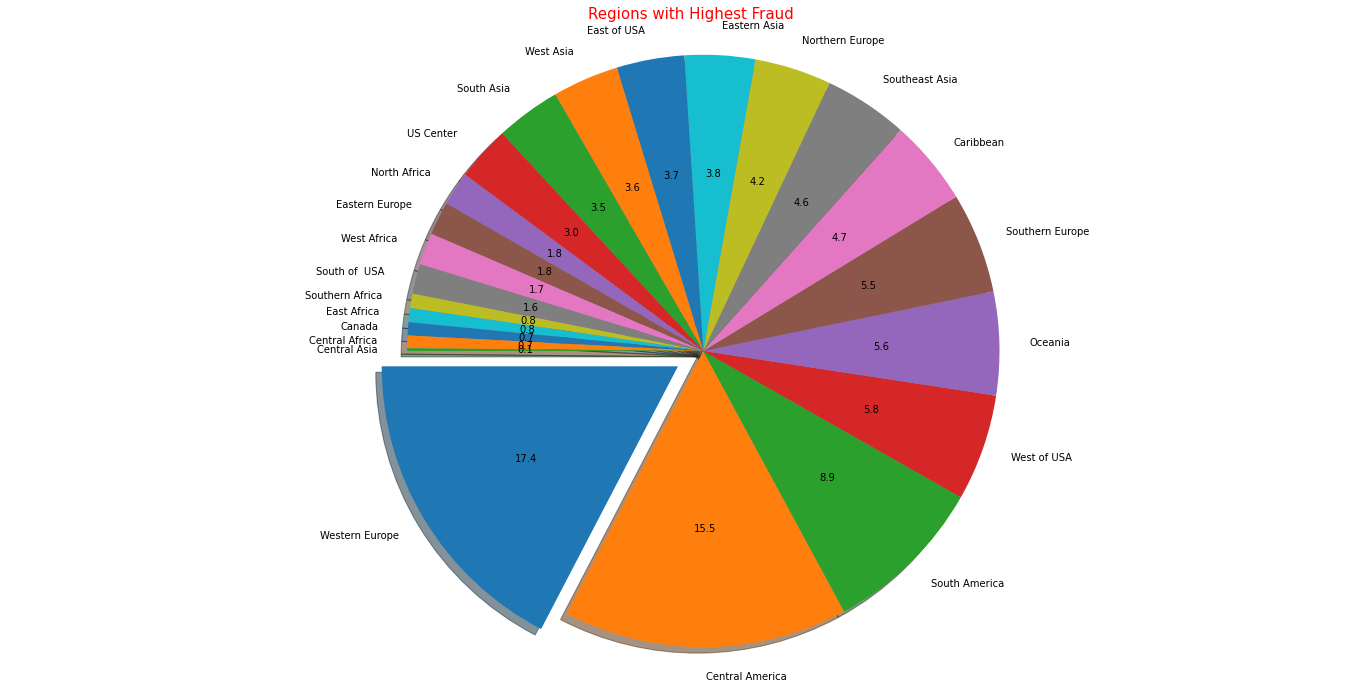

In [20]:
high_fraud = data[(data['Order Status'] == 'SUSPECTED_FRAUD') & (data['Type'] == 'TRANSFER')]
fraud=high_fraud['Order Region'].value_counts().plot.pie(figsize=(24,12),
                                                  startangle=180, explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),autopct='%.1f',shadow=True,)
plt.title("Regions with Highest Fraud",size=15,color='r') 
plt.ylabel(" ")
fraud.axis('equal') 
plt.show()

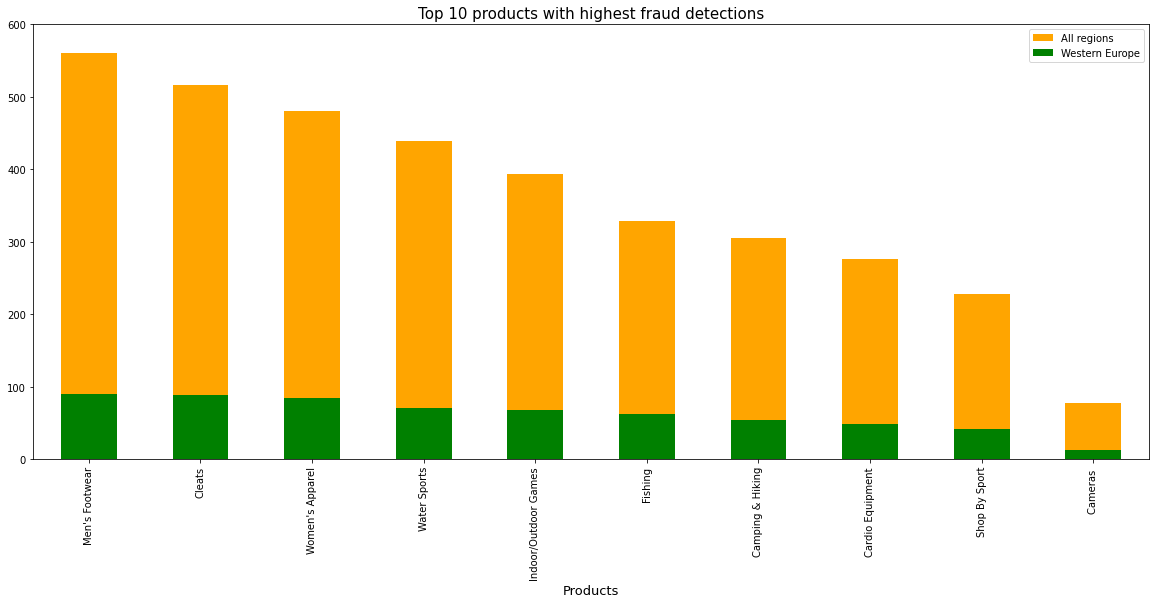

In [21]:
high_fraud1 = data[(data['Order Status'] == 'SUSPECTED_FRAUD')] # 
high_fraud2 = data[(data['Order Status'] == 'SUSPECTED_FRAUD') &(data['Order Region'] == 'Western Europe')]
#Plotting bar chart for top 10 most suspected fraud department in all regions
fraud1=high_fraud1['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud Category",color='orange')
#Plotting bar chart for top 10 most suspected fraud department in Western Europe
fraud2=high_fraud2['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud product in Western Europe",color='green')
plt.legend(["All regions", "Western Europe"])
plt.title("Top 10 products with highest fraud detections", size=15)
plt.xlabel("Products", size=13)
plt.ylim(0,600)
plt.show()

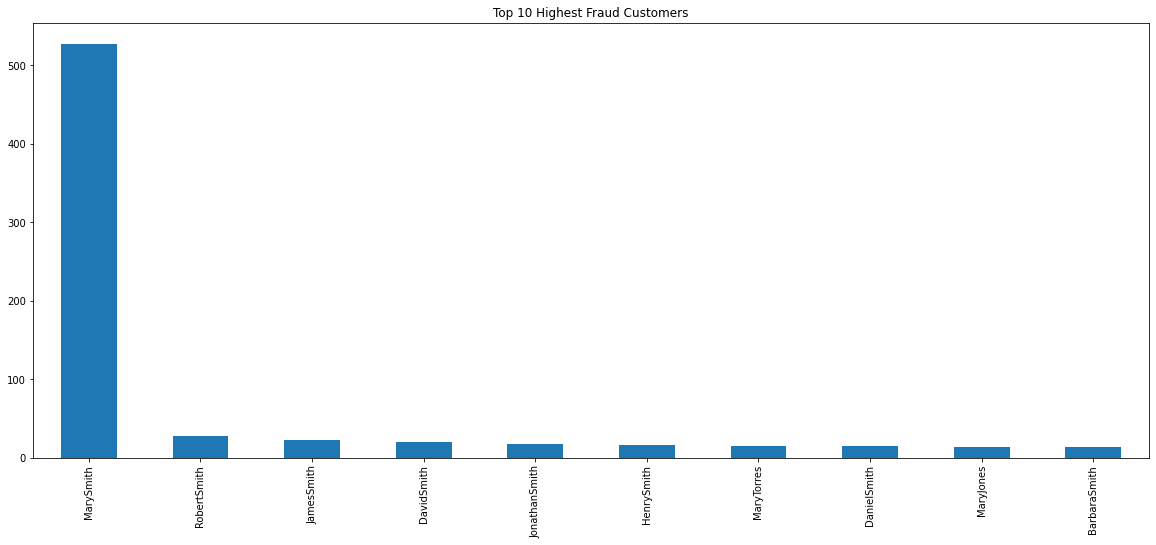

In [22]:
cus = data[(data['Order Status'] == 'SUSPECTED_FRAUD')] 
cus['Customer Full Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 Highest Fraud Customers")

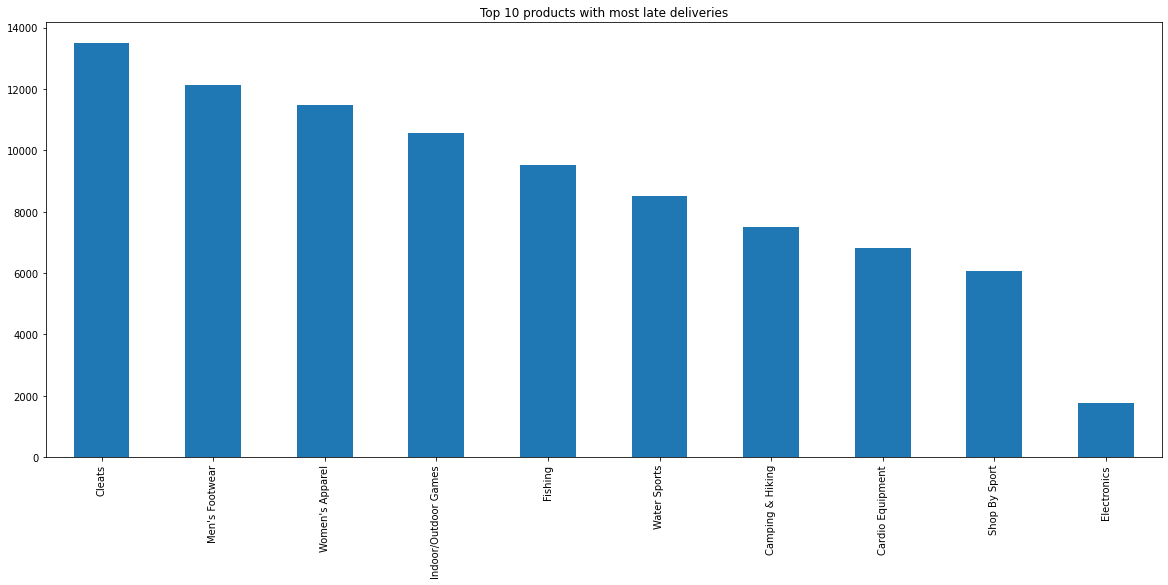

In [23]:
late_delivery = data[(data['Delivery Status'] == 'Late delivery')]
late_delivery['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 products with most late deliveries")

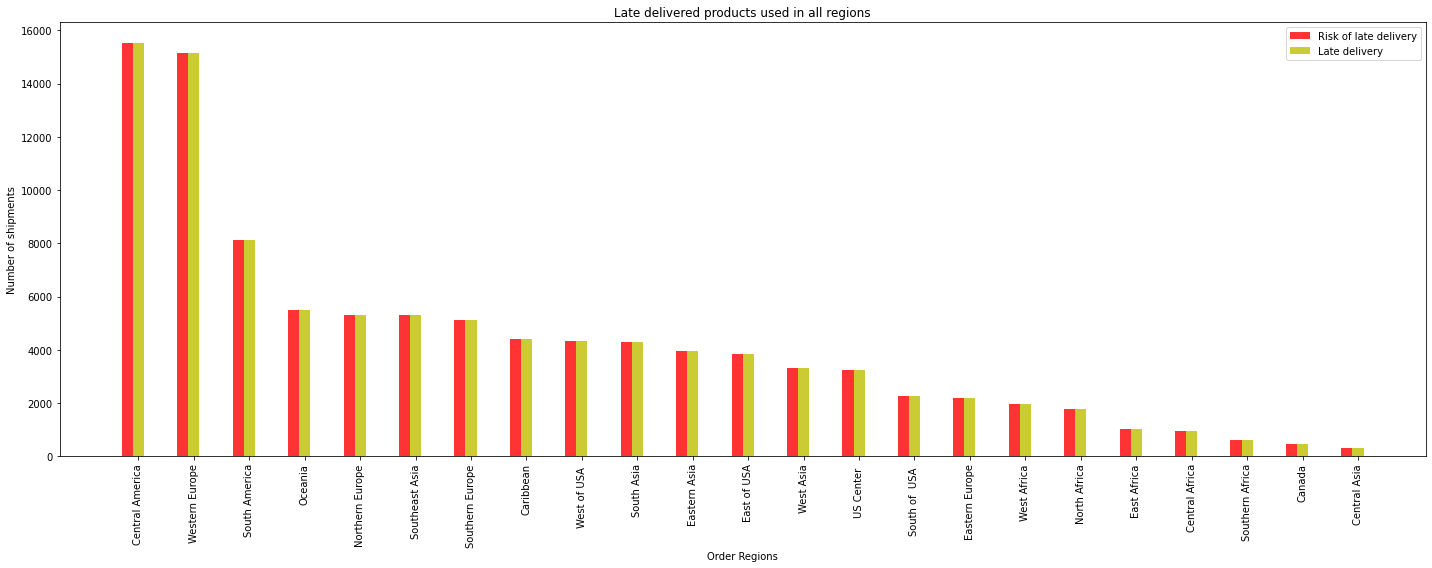

In [24]:
xyz1 = data[(data['Late_delivery_risk'] == 1)]
xyz2 = data[(data['Delivery Status'] == 'Late delivery')]
count1=xyz1['Order Region'].value_counts()
count2=xyz2['Order Region'].value_counts()
names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.8
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='r',label='Risk of late delivery')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='y',label='Late delivery')
plt.xlabel('Order Regions')
plt.ylabel('Number of shipments')
plt.title('Late delivered products used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()

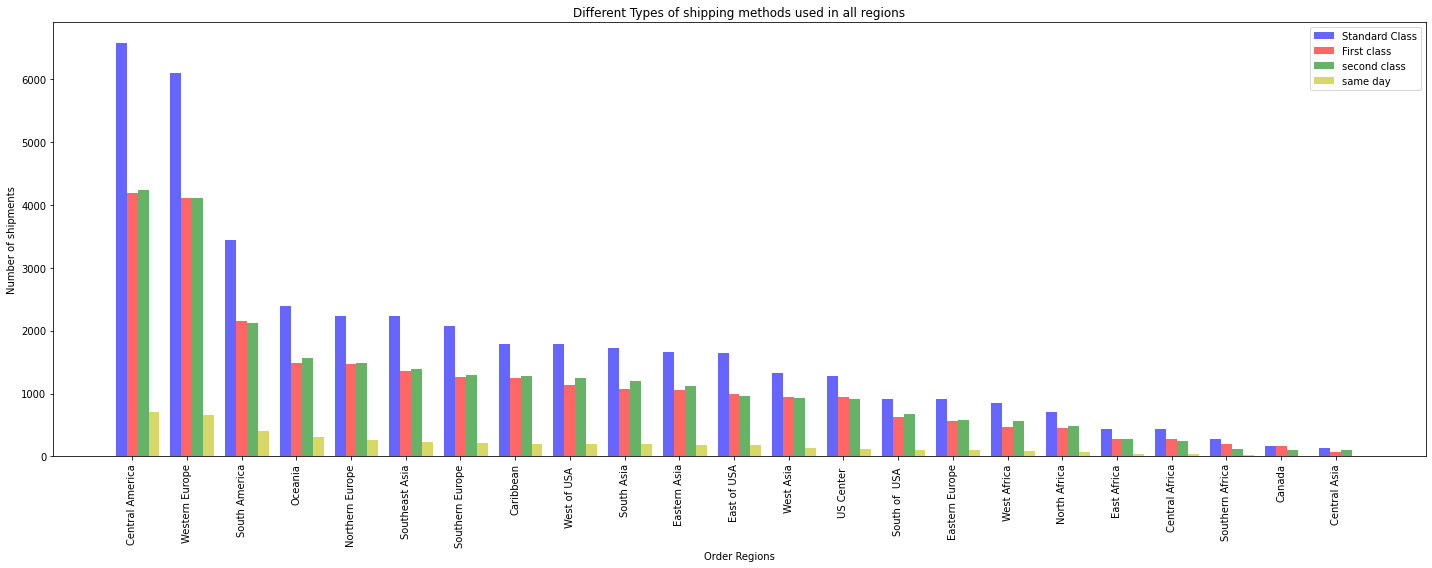

In [25]:
xyz1 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Standard Class')]
xyz2 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'First Class')]
xyz3 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Second Class')]
xyz4 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Same Day')]
count1=xyz1['Order Region'].value_counts()
count2=xyz2['Order Region'].value_counts()
count3=xyz3['Order Region'].value_counts()
count4=xyz4['Order Region'].value_counts()
names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Standard Class')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='First class')
type3=plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='g',label='second class')
type4=plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='y',label='same day')
plt.xlabel('Order Regions')
plt.ylabel('Number of shipments')
plt.title('Different Types of shipping methods used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()

In [26]:
data['TotalPrice'] = data['Order Item Quantity'] * data['Order Item Total']

In [27]:
present = dt.datetime(2018,2,1)
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

In [28]:
Customer_seg = data.groupby('Order Customer Id').agg({'order date (DateOrders)': lambda x: (present - x.max()).days, 'Order Id': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})
Customer_seg['order date (DateOrders)'] = Customer_seg['order date (DateOrders)'].astype(int)
# Renaming columns as R_Value,F_Value,M_Value
Customer_seg.rename(columns={'order date (DateOrders)': 'R_Value', 
                         'Order Id': 'F_Value', 
                         'TotalPrice': 'M_Value'}, inplace=True)
Customer_seg.head()

,R_Value,F_Value,M_Value
Order Customer Id,,,
1,792,1,2362.250061
2,136,10,2842.700073
3,229,18,6143.760057
4,380,14,4370.629991
5,457,7,2993.790032


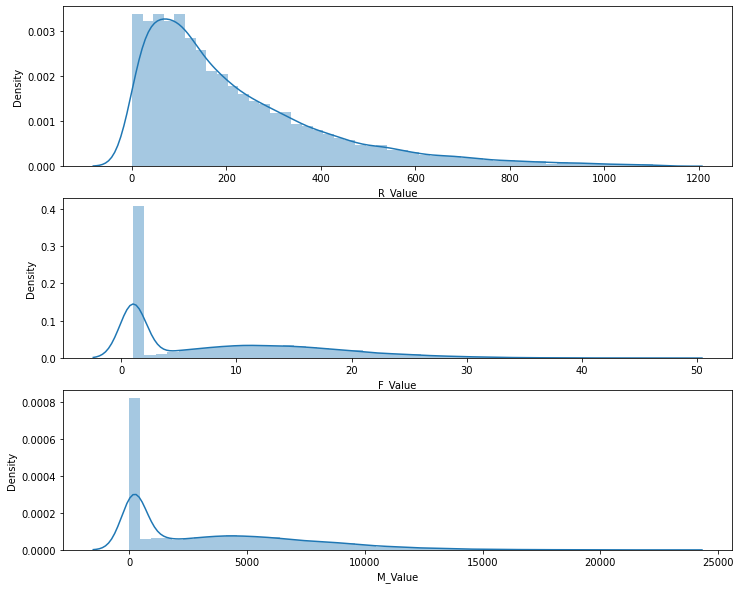

In [29]:
plt.figure(figsize=(12,10)) 
plt.subplot(3, 1, 1)
sns.distplot(Customer_seg['R_Value'])
plt.subplot(3, 1, 2) 
sns.distplot(Customer_seg['F_Value'])
plt.subplot(3, 1, 3)
sns.distplot(Customer_seg['M_Value'])
plt.show()

In [30]:
quantiles = Customer_seg.quantile(q=[0.25,0.5,0.75]) #Dividing RFM data into four quartiles
quantiles = quantiles.to_dict() 

In [31]:
# R_Score should be minimum so 1st quantile is set as 1.
def R_Score(a,b,c):
    if a <= c[b][0.25]:
        return 1
    elif a <= c[b][0.50]:
        return 2
    elif a <= c[b][0.75]: 
        return 3
    else:
        return 4
# The higher the F_Score,M_Score the better so 1st quantile is set as 4.    
def FM_Score(x,y,z):
    if x <= z[y][0.25]:
        return 4
    elif x <= z[y][0.50]:
        return 3
    elif x <= z[y][0.75]: 
        return 2
    else:
        return 1

In [32]:
# New column for R_Score to indicate numerical score between 1 to 4.
Customer_seg['R_Score'] = Customer_seg['R_Value'].apply(R_Score, args=('R_Value',quantiles))
# New column for F_Score to indicate numerical score between 1 to 4.
Customer_seg['F_Score'] = Customer_seg['F_Value'].apply(FM_Score, args=('F_Value',quantiles))
# New column for M_Score to indicate numerical score between 1 to 4.
Customer_seg['M_Score'] = Customer_seg['M_Value'].apply(FM_Score, args=('M_Value',quantiles))
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score
Order Customer Id,,,,,,
1,792,1,2362.250061,4,4,3
2,136,10,2842.700073,2,2,2
3,229,18,6143.760057,3,1,1
4,380,14,4370.629991,4,2,2
5,457,7,2993.790032,4,3,2


In [33]:
#Adding R,F,M Scores to one new column
Customer_seg['RFM_Score'] = Customer_seg.R_Score.astype(str)+ Customer_seg.F_Score.astype(str) + Customer_seg.M_Score.astype(str)
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score
Order Customer Id,,,,,,,
1,792,1,2362.250061,4,4,3,443
2,136,10,2842.700073,2,2,2,222
3,229,18,6143.760057,3,1,1,311
4,380,14,4370.629991,4,2,2,422
5,457,7,2993.790032,4,3,2,432


In [34]:
count=Customer_seg['RFM_Score'].unique()
print(count)# Printing all Unique values
len(count)

['443' '222' '311' '422' '432' '421' '211' '322' '434' '212' '411' '331'
 '412' '433' '321' '423' '333' '312' '221' '223' '332' '233' '232' '323'
 '444' '431' '343' '243' '344' '334' '244' '143' '144']


33

In [35]:
Customer_seg['RFM_Total_Score'] = Customer_seg[['R_Score','F_Score','M_Score']].sum(axis=1)
Customer_seg['RFM_Total_Score'].unique()

array([11,  6,  5,  8,  9,  7,  4, 10, 12])

In [36]:
# Define rfm_level function
def RFM_Total_Score(df):

    if (df['RFM_Total_Score'] >= 11):
        return 'Champions' 
    elif (df['RFM_Total_Score'] == 10):
        return 'Loyal Customers' 
    elif (df['RFM_Total_Score'] == 9): 
        return 'Recent Customers'
    elif (df['RFM_Total_Score'] == 8): 
         return 'Promising'
    elif (df['RFM_Total_Score'] == 7): 
        return 'Customers Needing Attention'
    elif (df['RFM_Total_Score'] == 6): 
        return 'Cant lose them'
    elif (df['RFM_Total_Score'] == 5): 
        return 'At Risk'
    else:                             
        return 'Lost'
# Create a new variable RFM_Level
Customer_seg['Customer_Segmentation'] =Customer_seg.apply(RFM_Total_Score, axis=1)
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score,Customer_Segmentation
Order Customer Id,,,,,,,,,
1,792,1,2362.250061,4,4,3,443,11,Champions
2,136,10,2842.700073,2,2,2,222,6,Cant lose them
3,229,18,6143.760057,3,1,1,311,5,At Risk
4,380,14,4370.629991,4,2,2,422,8,Promising
5,457,7,2993.790032,4,3,2,432,9,Recent Customers


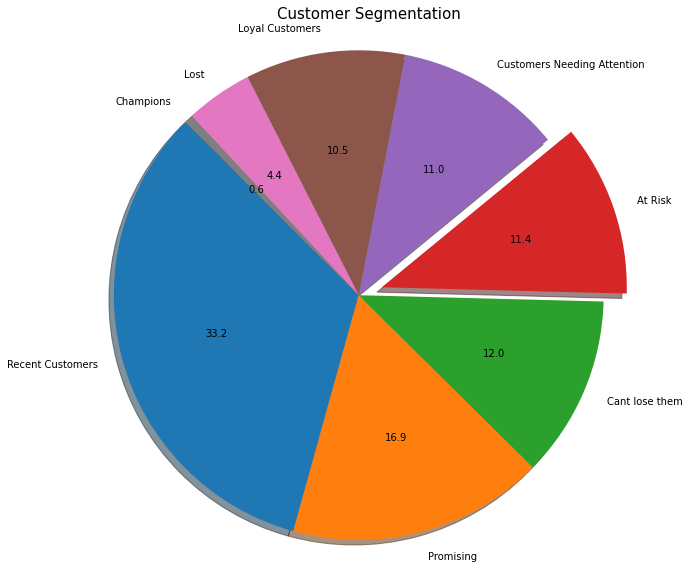

In [37]:
# Calculate average values for each RFM_Level, and return a size of each segment 
Customer_seg['Customer_Segmentation'].value_counts().plot.pie(figsize=(10,10),
                                        startangle=135, explode=(0,0,0,0.1,0,0,0,0),autopct='%.1f',shadow=True)
plt.title("Customer Segmentation",size=15)
plt.ylabel(" ")
plt.axis('equal') 
plt.show()

Data Modelling

In [38]:
train_data=data.copy()

In [39]:
train_data['fraud'] = np.where(data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
train_data['late_delivery']=np.where(data['Delivery Status'] == 'Late delivery', 1, 0)

In [40]:
train_data.drop(['Delivery Status','Late_delivery_risk','Order Status','order_month_year','order date (DateOrders)'], axis=1, inplace=True)

In [41]:
train_data.shape

(180519, 45)

In [42]:
train_data.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Id                        int64
Customer Segment                  object
Customer State                    object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Market                            object
Order City                        object
Order Country                     object
Order Customer Id                  int64
Order Id                           int64
Order Item Cardprod Id             int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Id                      int64
Order Item Produ

In [43]:
from sklearn.preprocessing import LabelEncoder
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
train_data['Customer Country']  = le.fit_transform(train_data['Customer Country'])
train_data['Market']            = le.fit_transform(train_data['Market'])
train_data['Type']              = le.fit_transform(train_data['Type'])
train_data['Product Name']      = le.fit_transform(train_data['Product Name'])
train_data['Customer Segment']  = le.fit_transform(train_data['Customer Segment'])
train_data['Customer State']    = le.fit_transform(train_data['Customer State'])
train_data['Order Region']      = le.fit_transform(train_data['Order Region'])
train_data['Order City']        = le.fit_transform(train_data['Order City'])
train_data['Category Name']     = le.fit_transform(train_data['Category Name'])
train_data['Customer City']     = le.fit_transform(train_data['Customer City'])
train_data['Department Name']   = le.fit_transform(train_data['Department Name'])
train_data['Order State']       = le.fit_transform(train_data['Order State'])
train_data['Shipping Mode']     = le.fit_transform(train_data['Shipping Mode'])
train_data['order_week_day']    = le.fit_transform(train_data['order_week_day'])
train_data['Order Country']     = le.fit_transform(train_data['Order Country'])
train_data['Customer Full Name']= le.fit_transform(train_data['Customer Full Name'])

In [44]:
train_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Product Price,Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,TotalPrice,fraud,late_delivery
0,1,3,4,91.250000,314.640015,73,40,66,1,20755,...,327.75,3,1876,2018,1,6,22,314.640015,0,0
1,3,5,4,-249.089996,311.359985,73,40,66,1,19492,...,327.75,3,5378,2018,1,2,12,311.359985,0,1
2,0,4,4,-247.779999,309.720001,73,40,452,0,19491,...,327.75,3,4429,2018,1,2,12,309.720001,0,0
3,1,3,4,22.860001,304.809998,73,40,285,0,19490,...,327.75,3,12929,2018,1,2,11,304.809998,0,0
4,2,2,4,134.210007,298.250000,73,40,66,1,19489,...,327.75,3,10638,2018,1,2,11,298.250000,0,0


In [45]:
#All columns expect fraud
xf=train_data.loc[:, train_data.columns != 'fraud']
#Only fraud column
yf=train_data['fraud']
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
xf_train, xf_test,yf_train,yf_test = train_test_split(xf,yf,test_size = 0.2,random_state = 42)
#All columns expect fraud
xl=train_data.loc[:, train_data.columns != 'late_delivery']
#Only fraud column
yl=train_data['late_delivery']
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
xl_train, xl_test,yl_train,yl_test = train_test_split(xl,yl,test_size = 0.2, random_state = 42)

In [46]:
sc = StandardScaler()
xf_train=sc.fit_transform(xf_train)
xf_test=sc.transform(xf_test)
xl_train=sc.fit_transform(xl_train)
xl_test=sc.transform(xl_test)

In [47]:
def classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test):
    model_f=model_f.fit(xf_train,yf_train) # Fitting train data for fraud detection
    model_l=model_l.fit(xl_train,yl_train) # Fitting train data for predection of late delivery
    yf_pred=model_f.predict(xf_test)
    yl_pred=model_l.predict(xl_test)  
    accuracy_f=accuracy_score(yf_pred, yf_test) #Accuracy for fraud detection
    accuracy_l=accuracy_score(yl_pred, yl_test) #Accuracy for predection of late delivery
    recall_f=recall_score(yf_pred, yf_test) #Recall score for  fraud detection
    recall_l=recall_score(yl_pred, yl_test)# Recall score for predection of late delivery
    conf_f=confusion_matrix(yf_test, yf_pred)# fraud detection
    conf_l=confusion_matrix(yl_test, yl_pred)#predection of late delivery
    f1_f=f1_score(yf_test, yf_pred)#fraud detection
    f1_l=f1_score(yl_test, yl_pred)#predection of late delivery
    print('Model paramters used are :',model_f)
    print('Accuracy of fraud status is        :', (accuracy_f)*100,'%')
    print('Recall score of fraud status is        :', (recall_f)*100,'%')
    print('Conf Matrix of fraud status is        :\n',  (conf_f))
    print('F1 score of fraud status is        :', (f1_f)*100,'%')
    print('Accuracy of late delivery status is:', (accuracy_l)*100,'%')
    print('Recall score of late delivery status is:', (recall_l)*100,'%')
    print('Conf Matrix of late delivery status is: \n',(conf_l))
    print('F1 score of late delivery status is:', (f1_l)*100,'%')

DTree Model

In [48]:
model_f = tree.DecisionTreeClassifier()
model_l = tree.DecisionTreeClassifier()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : DecisionTreeClassifier()
Accuracy of fraud status is        : 99.09705295812098 %
Recall score of fraud status is        : 82.34567901234567 %
Conf Matrix of fraud status is        :
 [[35111   143]
 [  183   667]]
F1 score of fraud status is        : 80.36144578313252 %
Accuracy of late delivery status is: 99.35464214491469 %
Recall score of late delivery status is: 99.4040404040404 %
Conf Matrix of late delivery status is: 
 [[16189   118]
 [  115 19682]]
F1 score of late delivery status is: 99.41157158370584 %


Random Forest Model

In [49]:
model_f = RandomForestClassifier()
model_l = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : RandomForestClassifier()
Accuracy of fraud status is        : 98.67604697540439 %
Recall score of fraud status is        : 98.4375 %
Conf Matrix of fraud status is        :
 [[35248     6]
 [  472   378]]
F1 score of fraud status is        : 61.2641815235008 %
Accuracy of late delivery status is: 98.60680257035231 %
Recall score of late delivery status is: 97.52216748768473 %
Conf Matrix of late delivery status is: 
 [[15804   503]
 [    0 19797]]
F1 score of late delivery status is: 98.74554206050328 %


Support Vector Machine Model

In [50]:
model_f = svm.LinearSVC()
model_l = svm.LinearSVC()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : LinearSVC()
Accuracy of fraud status is        : 97.74817194770662 %
Recall score of fraud status is        : 56.49122807017544 %
Conf Matrix of fraud status is        :
 [[35130   124]
 [  689   161]]
F1 score of fraud status is        : 28.370044052863435 %
Accuracy of late delivery status is: 98.84777309993352 %
Recall score of late delivery status is: 97.9419185672587 %
Conf Matrix of late delivery status is: 
 [[15891   416]
 [    0 19797]]
F1 score of late delivery status is: 98.96025993501625 %


Gaussian Naive Bayes Model

In [51]:
model_f = GaussianNB()
model_l = GaussianNB()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : GaussianNB()
Accuracy of fraud status is        : 87.84899180146243 %
Recall score of fraud status is        : 16.23066641206798 %
Conf Matrix of fraud status is        :
 [[30867  4387]
 [    0   850]]
F1 score of fraud status is        : 27.928371940200424 %
Accuracy of late delivery status is: 57.27066253046754 %
Recall score of late delivery status is: 56.20386144236229 %
Conf Matrix of late delivery status is: 
 [[  882 15425]
 [    2 19795]]
F1 score of late delivery status is: 71.95957613101405 %


Classification Comparison Tabel

In [52]:
#Giving column Values
classification_data = {'Classification Model':  ['Gausian Naive bayes', 'Random Forest','Support Vector Machines', 'Decision tree'],
        'Accuracy Score for Fraud Detection':     [87.84,98.67,97.74,99.11],
        'Recall Score for Fraud Detection':       [16.23,98.18,56.4,81.89],
        'F1 Score for Fraud Detection':           [27.92,61.21,28.62,81.11],
        'Accuracy Score for Late Delivery':       [57.27,98.6,98.84,99.32,],
        'Recall Score for Late Delivery':         [56.20,97.52,97.94,99.41],
        'F1 Score for Late Delivery':             [71.95,98.74,98.96,99.38] }
#Creating data frame with Column Names
classification_comparision = pd.DataFrame (classification_data, columns = ['Classification Model','Accuracy Score for Fraud Detection','Recall Score for Fraud Detection','F1 Score for Fraud Detection',
                                                                           'Accuracy Score for Late Delivery','Recall Score for Late Delivery','F1 Score for Late Delivery'])

In [53]:
classification_comparision

,Classification Model,Accuracy Score for Fraud Detection,Recall Score for Fraud Detection,F1 Score for Fraud Detection,Accuracy Score for Late Delivery,Recall Score for Late Delivery,F1 Score for Late Delivery
0,Gausian Naive bayes,87.84,16.23,27.92,57.27,56.20,71.95
1,Random Forest,98.67,98.18,61.21,98.60,97.52,98.74
2,Support Vector Machines,97.74,56.40,28.62,98.84,97.94,98.96
3,Decision tree,99.11,81.89,81.11,99.32,99.41,99.38


In [54]:
classification_comparision.max()

Classification Model                  Support Vector Machines
Accuracy Score for Fraud Detection                      99.11
Recall Score for Fraud Detection                        98.18
F1 Score for Fraud Detection                            81.11
Accuracy Score for Late Delivery                        99.32
Recall Score for Late Delivery                          99.41
F1 Score for Late Delivery                              99.38
dtype: object

In [55]:
def cross_validation_model(model_f,model_l,xf,yf,xl,yl):
    model_f= model_f.fit(xf,yf)
    model_l = model_l.fit(xl,yl)
    scores_f = cross_val_score(model_f, xf, yf, cv=6)
    scores_l = cross_val_score(model_l, xl, yl, cv=6)
    print('Model used is',model_f)
    print('Cross validation accuracy of fraud: %0.2f (+/- %0.2f)' % (scores_f.mean(), scores_f.std() * 2))
    print('Cross validation accuracy of late : %0.2f (+/- %0.2f)' % (scores_l.mean(), scores_l.std() * 2))

In [56]:
cross_validation_model(model_f,model_l,xf,yf,xl,yl)

Model used is GaussianNB()
Cross validation accuracy of fraud: 0.98 (+/- 0.00)
Cross validation accuracy of late : 0.86 (+/- 0.05)


RNN Classifier Model

In [57]:
keras.layers.BatchNormalization()
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(1024, activation='relu',kernel_initializer='random_normal', input_dim=44)) #Since we have 44 columns
#Third Hidden Layer
classifier.add(Dense(512, activation='relu',kernel_initializer='random_normal'))
#Fourth Hidden Layer
classifier.add(Dense(256, activation='relu',kernel_initializer='random_normal'))
#Fifth Hidden Layer
classifier.add(Dense(128, activation='relu',kernel_initializer='random_normal'))
#Sixth Hidden Layer
classifier.add(Dense(64, activation='relu',kernel_initializer='random_normal'))
#Seventh Hidden Layer
classifier.add(Dense(32, activation='relu',kernel_initializer='random_normal'))
#Eight Hidden Layer
classifier.add(Dense(16, activation='relu',kernel_initializer='random_normal'))
#Ninth Hidden Layer
classifier.add(Dense(8, activation='relu',kernel_initializer='random_normal'))
#Tenth Hidden Layer
classifier.add(Dense(4, activation='relu',kernel_initializer='random_normal'))
#Eleventh Hidden Layer
classifier.add(Dense(2, activation='relu',kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid',kernel_initializer='random_normal'))

In [74]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [76]:
#Fitting the data to the training dataset
classifier.fit(xf_train,yf_train, batch_size=512, epochs=10)

Epoch 1/10
283/283 [==============================] - 20s 65ms/step - loss: 0.6305 - accuracy: 0.9773
Epoch 2/10
283/283 [==============================] - 13s 46ms/step - loss: 0.5220 - accuracy: 0.9778
Epoch 3/10
283/283 [==============================] - 13s 46ms/step - loss: 0.4364 - accuracy: 0.9778
Epoch 4/10
283/283 [==============================] - 13s 46ms/step - loss: 0.3692 - accuracy: 0.9778
Epoch 5/10
283/283 [==============================] - 19s 66ms/step - loss: 0.3161 - accuracy: 0.9778
Epoch 6/10
283/283 [==============================] - 13s 46ms/step - loss: 0.2743 - accuracy: 0.9778
Epoch 7/10
283/283 [==============================] - 14s 49ms/step - loss: 0.2411 - accuracy: 0.9778
Epoch 8/10
283/283 [==============================] - 13s 46ms/step - loss: 0.2146 - accuracy: 0.9778
Epoch 9/10
283/283 [==============================] - 13s 46ms/step - loss: 0.1933 - accuracy: 0.9778
Epoch 10/10
283/283 [==============================] - 13s 46ms/step - loss: 0.176

In [77]:
classifier.fit(xf_train,yf_train, batch_size=512, epochs=30)

Epoch 1/30
283/283 [==============================] - 13s 46ms/step - loss: 0.1623 - accuracy: 0.9778
Epoch 2/30
283/283 [==============================] - 13s 46ms/step - loss: 0.1511 - accuracy: 0.9778
Epoch 3/30
283/283 [==============================] - 13s 46ms/step - loss: 0.1420 - accuracy: 0.9778
Epoch 4/30
283/283 [==============================] - 13s 45ms/step - loss: 0.1345 - accuracy: 0.9778
Epoch 5/30
283/283 [==============================] - 14s 49ms/step - loss: 0.1285 - accuracy: 0.9778
Epoch 6/30
283/283 [==============================] - 13s 46ms/step - loss: 0.1237 - accuracy: 0.9778
Epoch 7/30
283/283 [==============================] - 13s 46ms/step - loss: 0.1197 - accuracy: 0.9778
Epoch 8/30
283/283 [==============================] - 13s 46ms/step - loss: 0.1166 - accuracy: 0.9778
Epoch 9/30
283/283 [==============================] - 13s 46ms/step - loss: 0.1140 - accuracy: 0.9778
Epoch 10/30
283/283 [==============================] - 13s 46ms/step - loss: 0.112

In [78]:
train_evaluate=classifier.evaluate(xf_train, yf_train)
test_evaluate=classifier.evaluate(xf_test, yf_test)
print('accuracy for Train set is',train_evaluate)
print('accuracy for Test set is',test_evaluate)# evaluation of model.
yf_pred1=classifier.predict(xf_test,batch_size=512,verbose=1)
yf_pred=np.argmax(yf_pred1,axis=1)
print(f1_score(yf_test,yf_pred,average="weighted"))

1129/1129 [==============================] - 3s 3ms/step - loss: 0.1116 - accuracy: 0.9765
accuracy for Train set is [0.10664064437150955, 0.977758526802063]
accuracy for Test set is [0.11156555265188217, 0.976456880569458]
71/71 [==============================] - 1s 15ms/step
0.9648255733921929


 Comparison of Regression Models

In [58]:
xs=train_data.loc[:, train_data.columns != 'Sales']
ys=train_data['Sales']
xs_train, xs_test,ys_train,ys_test = train_test_split(xs,ys,test_size = 0.3, random_state = 42)
xq=train_data.loc[:, train_data.columns != 'Order Item Quantity']
yq=train_data['Order Item Quantity']
xq_train, xq_test,yq_train,yq_test = train_test_split(xq,yq,test_size = 0.3, random_state = 42)

In [59]:
scaler=MinMaxScaler()
xs_train=scaler.fit_transform(xs_train)
xs_test=scaler.transform(xs_test)
xq_train=scaler.fit_transform(xq_train)
xq_test=scaler.transform(xq_test)

In [60]:
def regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test):
    model_s=model_s.fit(xs_train,ys_train)#Fitting train data for sales
    model_q=model_q.fit(xq_train,yq_train)#Fitting train data for order quantity
    ys_pred=model_s.predict(xs_test)#predicting sales with test data
    yq_pred=model_q.predict(xq_test)#predicting order quantity with test data
    print('Model parameter used are:',model_s) #Printing the model to see which parameters are used
    #Printing mean absolute error for predicting sales
    print("MAE of sales is         :", metrics.mean_absolute_error(ys_test,ys_pred))
    #Printing Root mean squared error for predicting sales
    print("RMSE of sales is        :",np.sqrt(metrics.mean_squared_error(ys_test,ys_pred)))
    #Printing mean absolute error for predicting order quantity
    print("MAE of order quantity   :", metrics.mean_absolute_error(yq_test,yq_pred))
    #Printing Root mean squared error for predicting order quantity
    print("RMSE of order quantity  :",np.sqrt(metrics.mean_squared_error(yq_test,yq_pred)))

DTree Regression Model

In [61]:
model_s = tree.DecisionTreeRegressor()
model_q = tree.DecisionTreeRegressor()
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameter used are: DecisionTreeRegressor()
MAE of sales is         : 0.014490732081628568
RMSE of sales is        : 0.976672771793042
MAE of order quantity   : 3.6930349361104953e-05
RMSE of order quantity  : 0.006077034586136972


Random Forest Regression Model

In [62]:
model_s = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=40)
model_q = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=40)
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameter used are: RandomForestRegressor(max_depth=10, random_state=40)
MAE of sales is         : 0.19121919099686716
RMSE of sales is        : 1.7889323406223292
MAE of order quantity   : 0.00011928494080083997
RMSE of order quantity  : 0.006161240281968984


Linear Regression Model

In [63]:
model_s=LinearRegression()
model_q=LinearRegression()
regressionmodel(model_s,model_q,xs_train, xs_test,ys_train,ys_test,xq_train, xq_test,yq_train,yq_test)

Model parameter used are: LinearRegression()
MAE of sales is         : 0.0005995734726562265
RMSE of sales is        : 0.0014783494372305089
MAE of order quantity   : 0.3420250841815522
RMSE of order quantity  : 0.521534033492814


Regression Models Comparison Dataframe

In [64]:
#Assigning Column Values
Regression_data = {'Regression Model':  ['Decision Tree','Random Forest','Linear Regression'],
        'MAE Value for Sales' :        [0.19,0.02,0.0005],
        'RMSE Value for Sales':        [1.79, 1.01,0.0014],
        'MAE Value for Quantity' :     [0.00011,1.85 ,0.34],
        'RMSE Value for Quantity':     [0.0062,0.0042,0.52] }
#Creating data frame with Column Names
Regression_comparision = pd.DataFrame (Regression_data, columns = ['Regression Model','MAE Value for Sales','RMSE Value for Sales',
        'MAE Value for Quantity','RMSE Value for Quantity'])

In [65]:
Regression_comparision #Printing dataframe

,Regression Model,MAE Value for Sales,RMSE Value for Sales,MAE Value for Quantity,RMSE Value for Quantity
0,Decision Tree,0.1900,1.7900,0.00011,0.0062
1,Random Forest,0.0200,1.0100,1.85000,0.0042
2,Linear Regression,0.0005,0.0014,0.34000,0.5200


In [66]:
Regression_comparision.min()

Regression Model           Decision Tree
MAE Value for Sales               0.0005
RMSE Value for Sales              0.0014
MAE Value for Quantity           0.00011
RMSE Value for Quantity           0.0042
dtype: object

RNN Regression Model

In [67]:
regressor = Sequential()

#First Hidden Layer
regressor.add(Dense(512, activation='relu',kernel_initializer='normal',input_dim=44))
#Second  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))
#Third  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))
#Fourth  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))
#Fifth  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))

#Output Layer
regressor.add(Dense(1, activation='linear'))# Linear activation is used.

In [68]:
regressor.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [69]:
#Fitting the data to the training dataset
regressor.fit(xq_train,yq_train, batch_size=256, epochs=10)

Epoch 1/10
494/494 [==============================] - 8s 14ms/step - loss: 0.2667 - mean_absolute_error: 0.2667
Epoch 2/10
494/494 [==============================] - 7s 14ms/step - loss: 0.0912 - mean_absolute_error: 0.0912
Epoch 3/10
494/494 [==============================] - 7s 14ms/step - loss: 0.0729 - mean_absolute_error: 0.0729
Epoch 4/10
494/494 [==============================] - 7s 14ms/step - loss: 0.0613 - mean_absolute_error: 0.0613
Epoch 5/10
494/494 [==============================] - 7s 14ms/step - loss: 0.0571 - mean_absolute_error: 0.0571
Epoch 6/10
494/494 [==============================] - 7s 14ms/step - loss: 0.0440 - mean_absolute_error: 0.0440
Epoch 7/10
494/494 [==============================] - 7s 14ms/step - loss: 0.0399 - mean_absolute_error: 0.0399
Epoch 8/10
494/494 [==============================] - 7s 14ms/step - loss: 0.0365 - mean_absolute_error: 0.0365
Epoch 9/10
494/494 [==============================] - 7s 14ms/step - loss: 0.0350 - mean_absolute_error:

In [70]:
#50 more epochs will be run
regressor.fit(xq_train,yq_train, batch_size=256, epochs=50)

Epoch 1/50
494/494 [==============================] - 7s 14ms/step - loss: 0.0345 - mean_absolute_error: 0.0345
Epoch 2/50
494/494 [==============================] - 7s 14ms/step - loss: 0.0289 - mean_absolute_error: 0.0289
Epoch 3/50
494/494 [==============================] - 7s 14ms/step - loss: 0.0304 - mean_absolute_error: 0.0304
Epoch 4/50
494/494 [==============================] - 7s 14ms/step - loss: 0.0257 - mean_absolute_error: 0.0257
Epoch 5/50
494/494 [==============================] - 7s 14ms/step - loss: 0.0237 - mean_absolute_error: 0.0237
Epoch 6/50
494/494 [==============================] - 7s 14ms/step - loss: 0.0248 - mean_absolute_error: 0.0248
Epoch 7/50
494/494 [==============================] - 7s 14ms/step - loss: 0.0265 - mean_absolute_error: 0.0265
Epoch 8/50
494/494 [==============================] - 7s 14ms/step - loss: 0.0241 - mean_absolute_error: 0.0241
Epoch 9/50
494/494 [==============================] - 7s 14ms/step - loss: 0.0210 - mean_absolute_error:

In [71]:
pred_train_q= regressor.predict(xq_train)
pred_q_test= regressor.predict(xq_test)
print('MAE Value train data:',regressor.evaluate(xq_train,yq_train))
print('RMSE of train data:',np.sqrt(mean_squared_error(yq_train,pred_train_q)))
print('MAE Value test data:',regressor.evaluate(xq_test,yq_test))
print('RMSE of test data:',np.sqrt(mean_squared_error(yq_test,pred_q_test)))

3949/3949 [==============================] - 7s 2ms/step - loss: 0.0229 - mean_absolute_error: 0.0229
MAE Value train data: [0.02286660484969616, 0.02286660484969616]
RMSE of train data: 0.046304036445524825
1693/1693 [==============================] - 3s 2ms/step - loss: 0.0227 - mean_absolute_error: 0.0227
MAE Value test data: [0.022737691178917885, 0.022737691178917885]
RMSE of test data: 0.04719528551713769


In [72]:
def train_test(model, X_train, y_train, X_test, y_test):
  # X_train, y_train = SMOTE(sampling_strategy='minority', random_state = 42).fit_resample(X_train, y_train)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  report = classification_report(y_test, y_pred, output_dict = True)
  cr = pd.DataFrame(report).transpose()
  print(cr)
  return y_pred

# Fraud Detection

In [73]:
X = data.copy()
y = X.pop('fraud')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

KeyError: ignored

In [ ]:
models = {
    'RFC': RandomForestClassifier(),
    'SVC': SVC(),
    'DT': DecisionTreeClassifier(),
    'ANN':  MLPClassifier(),
    # 'XGB': xgb()
}

y_pred_fraud = {}

for name in models.keys():
  print(name)
  y_pred_fraud[name] = train_test(models[name], X_train, y_train, X_test, y_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred_fraud['DT'], labels=[0, 1])
ConfusionMatrixDisplay(cm).plot()
plt.show()

# Late Delivery

In [ ]:
X = data.copy()
y = X.pop('late_delivery')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
y_pred_late = {}
for name in models.keys():
  if name == "SVC":
    continue
  print(name)
  y_pred_late[name] = train_test(models[name], X_train, y_train, X_test, y_test)
cm = confusion_matrix(y_test, y_pred_late['DT'], labels=[0, 1])
ConfusionMatrixDisplay(cm).plot()
plt.show()

# Sales Regression

In [ ]:
def train_test_reg(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
  print("MAE: ", mean_absolute_error(y_test, y_pred),'\n')
  return y_pred

In [ ]:
X = data.copy()
y = X.pop('Sales')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# minmax = MinMaxScaler()
# X_train = minmax.fit_transform(X_train)
# X_test = minmax.transform(X_test)

In [ ]:
models = {
    'linear': LinearRegression(),
    'lgb': lgb.LGBMRegressor(),
    'xgb': xgb.XGBRegressor()
}

y_pred_sales = {}

for name in models.keys():
  print(name)
  y_pred_sales[name] = train_test_reg(models[name], X_train, y_train, X_test, y_test)

In [ ]:
y_pred_sales['lgb'].shape

In [ ]:
i = 0
for col in X.columns :
  # plt.scatter(X_train[:,i], y_train, color="black")
  plt.plot(X_test[col], y_pred_sales['lgb'], color="blue", linewidth=1)
  plt.show()


# Order Quantity Regression

In [ ]:
X = data.copy()
y = X.pop('Order Item Quantity')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

In [ ]:
y_pred_order = {}

for name in models.keys():
  print(name)
  y_pred_order[name] = train_test_reg(models[name], X_train, y_train, X_test, y_test)

In [ ]:
data.columns